# <center>DSTalks Redes Neurais Artificiais

Agenda
=====
   * Breve histórico
   * O que é um neurônio artificial?
   * O que é uma rede neural artificial?
   * Implementação Raiz
   * Implementação Nutella
   * Aplicações

### **Histórico**


Neural networks are computational models for machine learning that are inspired by the structure of the biological brain.

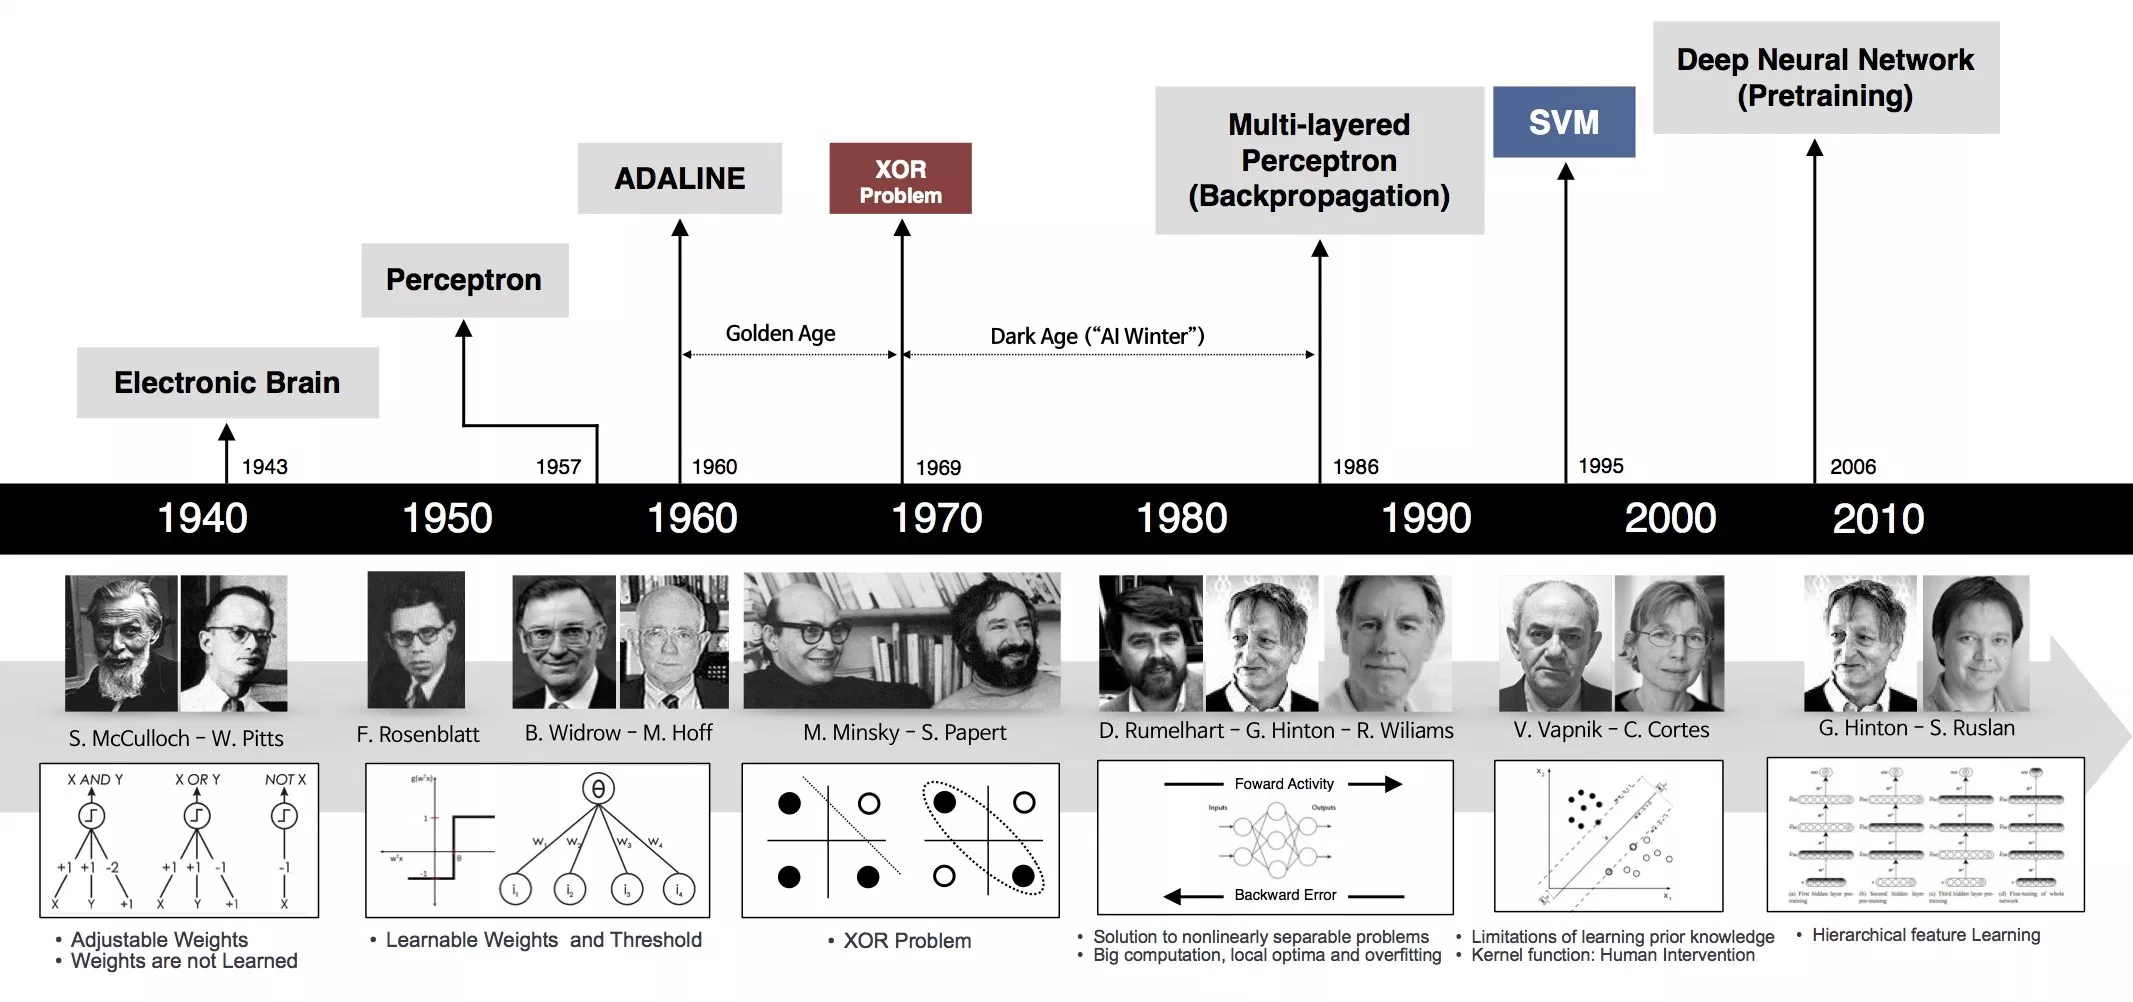

1940s > **Donald Hebb** created **Hebbian learning**, which observed from biology that the synapse between two neurons is strengthened if the two neurons are simultaneously active.


### **O que é um Neurônio Artificial e uma Rede Neural Artificial? (ANN)**

Neural networks represent an information-processing paradigm that is loosely inspired by the human brain. 

In our brain, there are billions of cells called neurons, which processes information in the form of electric signals. External information/stimuli is received by the dendrites of the neuron, processed in the neuron cell body, converted to an output and passed through the Axon to the next neuron. The next neuron can choose to either accept it or reject it depending on the strength of the signal.

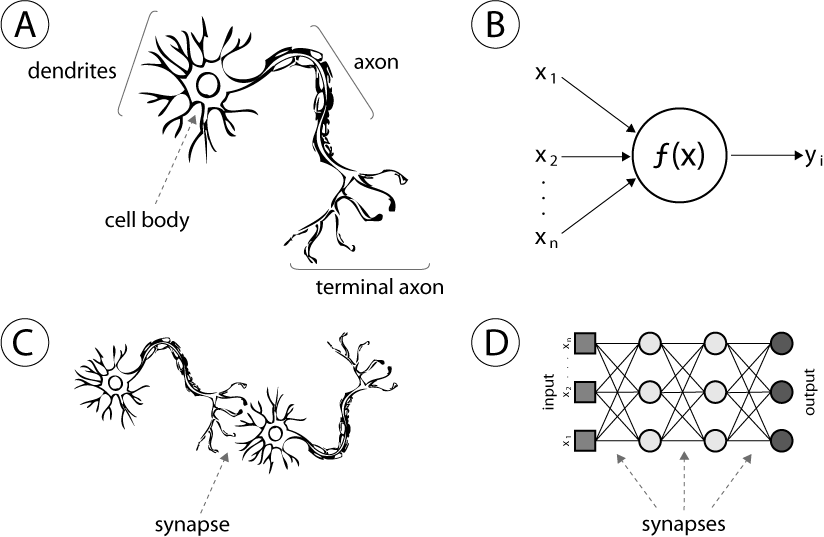

**Neurônio Real:**
    1. Sinal externo é captado pelos dendritos
    2. Sinal externo é processado no corpo da célula do neurônio
    3. Sinal processado é convertido para um sinal de saída e transmitido ao longo do axônio
    4. Sinal de saída é recebido pelos dendritos do próximo neurônio através de sinapse
    
**Neurônio Artificial:**
    1. Dados de Input
    2. Processamento do Input (pesos)
    3. Processamento de saída e transmissão para próximo neurônio
    4. Resultado é recebido pelo próximo neurônio

### Componentes de uma Rede Neural Artificial

 * Uma camada de entrada, x (input layer)
 * Um número de camadas intermediárias (hidden layers)
 * Uma camada de saída, ŷ (output layer)
 * Um conjunto de pesos e bias entre cada camada, W e b (weights and bias)
 * Uma função de ativação para cada camada, σ.

<img src="http://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZo19High.png" alt="NeuralNetworkZo19High.png" width="700" title="Model Zoo [http://www.asimovinstitute.org/]">

source: [http://www.asimovinstitute.org/](http://www.asimovinstitute.org/)

### Backpropagation

<img src='https://img.devrant.com/devrant/rant/r_1922673_gic3B.jpg' style='width:400px;height:400px'/>

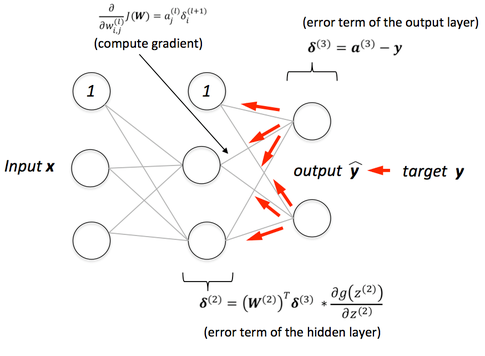

In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
# Necessário para importar de um diretório acima ao que está o notebook
import sys
sys.path.append("..")

In [3]:
import numpy as np
import src.neural_network as nn
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from src.utils import load_dataset

%matplotlib inline

## Implementação Raiz

$y ̂= σ(W_2 σ(W_1 x+b_1 )+ b_2)$

h = $W_1x + b_1$

σ = Sigmoid(h)

$$ Sigmoid(h) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-h} }  $$ 


#### Função Sigmoid

In [4]:
x = np.linspace(-5, 5, 100)
sig_x = nn.sigmoid(x)
["x = {}, sigmoid(x) = {:.4f}".format(x[i], sig_x[i]) for i in range(len(x))][0:10]

['x = -5.0, sigmoid(x) = 0.0067',
 'x = -4.898989898989899, sigmoid(x) = 0.0074',
 'x = -4.797979797979798, sigmoid(x) = 0.0082',
 'x = -4.696969696969697, sigmoid(x) = 0.0090',
 'x = -4.595959595959596, sigmoid(x) = 0.0100',
 'x = -4.494949494949495, sigmoid(x) = 0.0110',
 'x = -4.393939393939394, sigmoid(x) = 0.0122',
 'x = -4.292929292929293, sigmoid(x) = 0.0135',
 'x = -4.191919191919192, sigmoid(x) = 0.0149',
 'x = -4.090909090909091, sigmoid(x) = 0.0164']

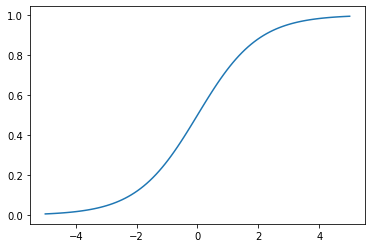

In [5]:
plt.plot(x, sig_x)

<img src="img/FeedForward.png" alt="FeedForward.png" width="700" title="Feed Forward">

Minimizar Loss


$$Loss(\hat{y}, y) = -\frac{1}N \sum_{i=1}^{N}\ [y_ilog(\hat{y}_{i})+(1-y_i)log(1-\hat{y}_i)]$$

### Gradient Descent
<img src="img/GradientDescent.png" alt="GradientDescent.png" width="700" title="Feed Forward">

### Derivada
$$\mathbf{h} = \mathbf{w}^T \mathbf{X}$$




$$\mbox{Logistic regression: }\mathbf{z} = \sigma(\mathbf{h}) = 
\frac{1}{1 + e^{-\mathbf{h}}}$$




$$\mbox{Cross-entropy loss: } J(\mathbf{w}) = 
-(\mathbf{y} log(\mathbf{z}) + (1 - \mathbf{y})log(1 - \mathbf{z}))$$




$$\mbox{Use chain rule: } 
\frac{\partial{J(\mathbf{w})}}{\partial{\mathbf{w}}} = 
\frac{\partial{J(\mathbf{w})}}{\partial{\mathbf{z}}}
\frac{\partial{\mathbf{z}}}{\partial{\mathbf{h}}}
\frac{\partial{\mathbf{h}}}{\partial{\mathbf{\mathbf{w}}}}$$



$$\frac{\partial{J(\mathbf{w})}}{\partial{\mathbf{z}}} = 
-(\frac{\mathbf{y}}{\mathbf{z}} - \frac{1-\mathbf{y}}{1-\mathbf{z}}) = 
\frac{\mathbf{z} - \mathbf{y}}{\mathbf{z}(1-\mathbf{z})}$$




$$\frac{\partial{\mathbf{z}}}{\partial{\mathbf{h}}} = 
\mathbf{z}(1-\mathbf{z})$$




$$\frac{\partial{\mathbf{h}}}{\partial{\mathbf{\mathbf{w}}}} = 
\mathbf{X}$$




$$\frac{\partial{J(\mathbf{w})}}{\partial{\mathbf{w}}} = 
\mathbf{X}^T (\mathbf{z}-\mathbf{y})$$




$$\mbox{Gradient descent: } \mathbf{w} = \mathbf{w} - 
\alpha \frac{\partial{J(\mathbf{w})}}{\partial{\mathbf{w}}}$$

#### Carregando os dados

<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-07/31/15/asset/buzzfeed-prod-web-06/sub-buzz-11186-1533065755-7.png" style='width:400px;height:400px'/>

In [6]:
train_set_x_orig, train_set_y, val_set_x_orig, val_set_y, classes = load_dataset()

y = [1], É uma imagem de 'bacate bonito'.


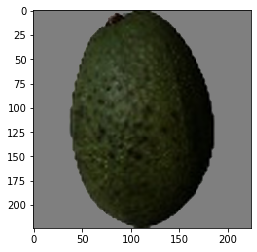

In [7]:
# Example of a picture
index = 28
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", É uma imagem de '" + classes[np.squeeze(train_set_y[:, index])] +  "'.")

In [8]:
m_train = train_set_x_orig.shape[0]
m_val = val_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Número de exemplos de treinamento: m_train = " + str(m_train))
print ("Número de exemplos de validação: m_test = " + str(m_val))
print ("Altura/Largura de cada imagem: num_px = " + str(num_px))
print ("Cada imagem tem o tamanho de: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("val_set_x shape: " + str(val_set_x_orig.shape))
print ("val_set_y shape: " + str(val_set_y.shape))

Número de exemplos de treinamento: m_train = 733
Número de exemplos de validação: m_test = 184
Altura/Largura de cada imagem: num_px = 224
Cada imagem tem o tamanho de: (224, 224, 3)
train_set_x shape: (733, 224, 224, 3)
train_set_y shape: (1, 733)
val_set_x shape: (184, 224, 224, 3)
val_set_y shape: (1, 184)


In [9]:
# Reshape nos conjuntos de treino e validação
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
val_set_x_flatten = val_set_x_orig.reshape(val_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("val_set_x_flatten shape: " + str(val_set_x_flatten.shape))
print ("val_set_y shape: " + str(val_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (150528, 733)
train_set_y shape: (1, 733)
val_set_x_flatten shape: (150528, 184)
val_set_y shape: (1, 184)
sanity check after reshaping: [127 127 127 127 127]


In [10]:
train_set_x = train_set_x_flatten/255.
val_set_x = val_set_x_flatten/255.

## Modelagem Raiz

In [11]:
d = nn.model(train_set_x, train_set_y, val_set_x, val_set_y, num_iterations = 400, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.000425
train accuracy: 100.0 %
test accuracy: 100.0 %


In [13]:
y_pred = d['Y_prediction_test']
classes_vec = np.where(y_pred==1, classes[1], classes[0])

y = 0, seu algoritmo previu "banana".


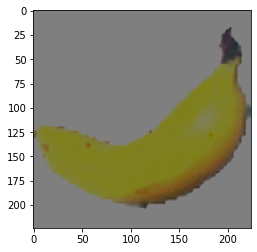

In [14]:
# Example of a picture that was wrongly classified.
index = 123
plt.imshow(val_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(val_set_y[0,index]) + ", seu algoritmo previu \"" + classes_vec[0][index] +  "\".")

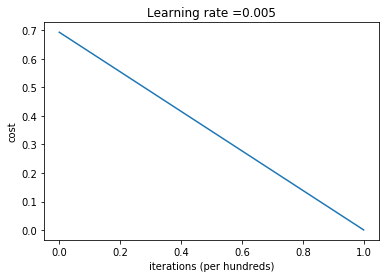

In [15]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 100.0 %
test accuracy: 100.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 100.0 %
test accuracy: 100.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 100.0 %
test accuracy: 100.0 %

-------------------------------------------------------



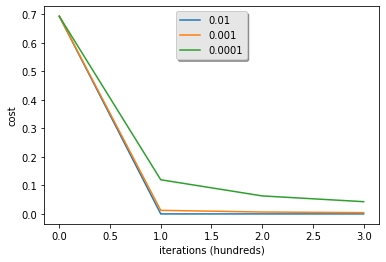

In [17]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("Learning Rate é: " + str(i))
    models[str(i)] = nn.model(train_set_x, train_set_y, val_set_x, val_set_y, num_iterations = 400, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()



### Teste com imagem nova

/Users/mdmiranda/anaconda3/envs/ds-talks-ann/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/Users/mdmiranda/anaconda3/envs/ds-talks-ann/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


y = 1.0, o algoritmo previu "bacate bonito" .


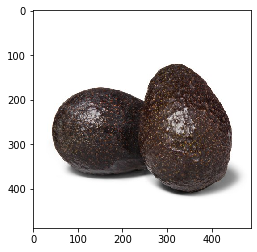

In [21]:
import scipy

my_image = "avocado_true.jpg"   # Trocar para o nome da imagem que baixar e Salvar na pasta data
fname = "../data/" + my_image
image = np.array(scipy.misc.imread(fname))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_image = my_image/255.
my_predicted_image = nn.predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", o algoritmo previu \"" + classes[int(np.squeeze(my_predicted_image)),] +  "\" .")

/Users/mdmiranda/anaconda3/envs/ds-talks-ann/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/Users/mdmiranda/anaconda3/envs/ds-talks-ann/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


y = 0.0, o algoritmo previu "banana" .


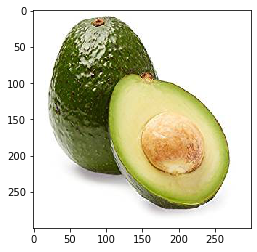

In [24]:

my_image = "my_image.jpg"  

fname = "../data/" + my_image
image = np.array(scipy.misc.imread(fname))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_image = my_image/255.
my_predicted_image = nn.predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", o algoritmo previu \"" + classes[int(np.squeeze(my_predicted_image)),] +  "\" .")

## Modelagem Nutella

In [58]:
from keras.models import Sequential
from keras.layers import Dense

In [62]:
train_set_x.shape[0]

150528

In [75]:
model = Sequential()
model.add(Dense(60, input_dim=train_set_x.shape[0], kernel_initializer='normal', activation='relu'))
model.add(Dense(60, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
model.fit(train_set_x.T, train_set_y.T, batch_size = 32, epochs = 5, verbose = 1)

Epoch 1/5
733/733 [==============================] - 4s 5ms/step - loss: 0.2068 - acc: 0.9086
Epoch 2/5
733/733 [==============================] - 3s 4ms/step - loss: 0.0014 - acc: 1.0000
Epoch 3/5
733/733 [==============================] - 3s 4ms/step - loss: 5.1881e-05 - acc: 1.0000
Epoch 4/5
733/733 [==============================] - 3s 4ms/step - loss: 4.2968e-05 - acc: 1.0000
Epoch 5/5
733/733 [==============================] - 3s 4ms/step - loss: 3.4619e-05 - acc: 1.0000


/Users/mdmiranda/anaconda3/envs/ds-talks-ann/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/Users/mdmiranda/anaconda3/envs/ds-talks-ann/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


y = 1, o algoritmo previu "bacate bonito" .


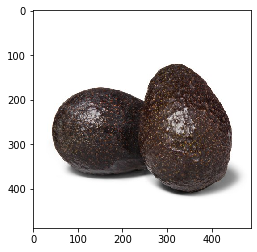

In [79]:

my_image = "avocado_true.jpg"  

fname = "../data/" + my_image
image = np.array(scipy.misc.imread(fname))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_image = my_image/255.
my_predicted_image = model.predict(my_image.T)
my_predicted_image = np.where(my_predicted_image>=0.5, 1, 0)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", o algoritmo previu \"" + classes[int(np.squeeze(my_predicted_image)),] +  "\" .")